# Нейронная сеть
* Подготовить данные, создать DataLoader
* Описать архитектуру нейронную сеть
* Выбрать loss
* Выбрать optimizer
* Написать цикл обучения

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.

In [3]:
y_train = torch.sin(x_train)

(-10.0, 10.0, -1.0, 1.0)

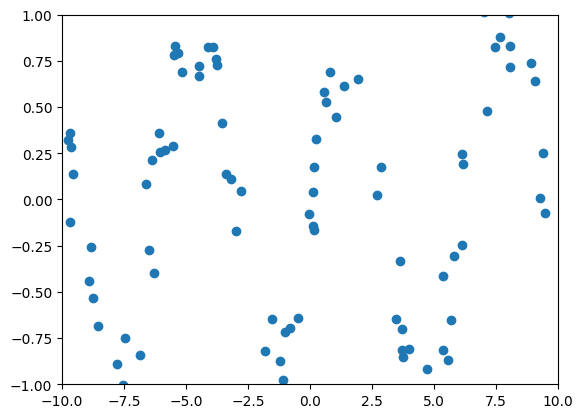

In [4]:
noise = torch.randn(y_train.shape) / 5.
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.axis([-10, 10, -1, 1])

In [5]:
x_train.shape

torch.Size([100])

(-10.0, 10.0, -1.0, 1.0)

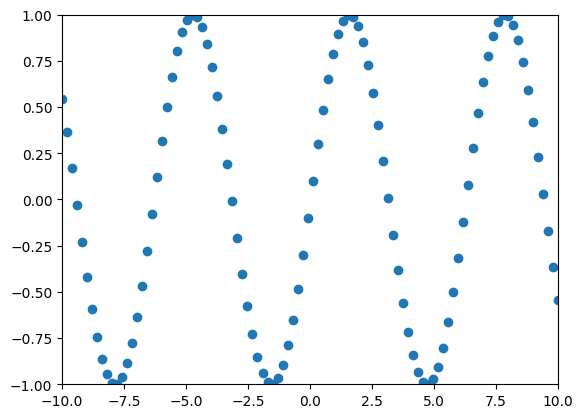

In [6]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)
x_test = torch.linspace(-10, 10, 100)
y_test = torch.sin(x_test)
x_test.unsqueeze_(1)
y_test.unsqueeze_(1)
plt.plot(x_test.numpy(), y_test.numpy(), 'o')
plt.axis([-10, 10, -1, 1])

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])


In [8]:
class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super().__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        #self.act1 = torch.nn.Tanh()
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.act1(out)
        out = self.fc2(out)
        return out

In [17]:
my_net = RegressionNet(100)

In [10]:
#MSE
def loss(pred, target):
    sq = (pred - target)**2
    return sq.mean()

In [18]:
#optimizer = torch.optim.SGD(my_net.parameters(), lr=0.001, momentum=0.9)
optimizer = torch.optim.Adam(my_net.parameters(), lr=0.01)

In [12]:
def metric(net, x, target):
    with torch.no_grad():
        pred = net.forward(x)
        return (pred - target).abs().mean()

In [13]:
def predict(net, x, y):
    with torch.no_grad():
        y_pred = net.forward(x)
        plt.plot(x.numpy(), y.numpy(), 'o', label='Ground truth')
        plt.plot(x.numpy(), y_pred.numpy(), 'o', c='r', label='Predicted')
        plt.xlabel('$x$')
        plt.ylabel('$y$')

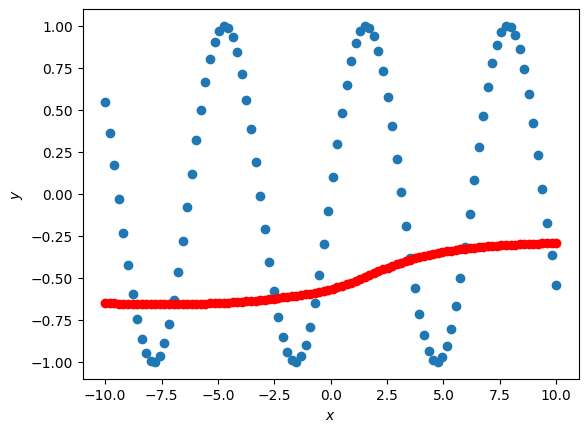

In [14]:
predict(my_net, x_test, y_test)

In [19]:
for epoch_idx in range(500):
    optimizer.zero_grad()

    y_pred = my_net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    loss_value.backward()
    optimizer.step()

    
    print(epoch_idx, metric(my_net, x_test, y_test).item())   

0 0.6038800477981567
1 0.6038848757743835
2 0.6040728092193604
3 0.6043108105659485
4 0.6045829057693481
5 0.604878842830658
6 0.6051888465881348
7 0.6055037379264832
8 0.6058151125907898
9 0.6063017845153809
10 0.6068057417869568
11 0.6074721813201904
12 0.6081073880195618
13 0.608662486076355
14 0.6092109084129333
15 0.6098200082778931
16 0.6102887988090515
17 0.6106196641921997
18 0.6108181476593018
19 0.6108924746513367
20 0.6108532547950745
21 0.6107124090194702
22 0.6104836463928223
23 0.6101810932159424
24 0.6098193526268005
25 0.6094130873680115
26 0.6089764833450317
27 0.6085717082023621
28 0.6082698702812195
29 0.6079727411270142
30 0.6076866984367371
31 0.6074172854423523
32 0.6071690320968628
33 0.6069456338882446
34 0.6067855358123779
35 0.6066750884056091
36 0.6065844297409058
37 0.6065134406089783
38 0.6064616441726685
39 0.606428325176239
40 0.6064119935035706
41 0.6064111590385437
42 0.60642409324646
43 0.606448769569397
44 0.6064832806587219
45 0.6065254211425781
46 0

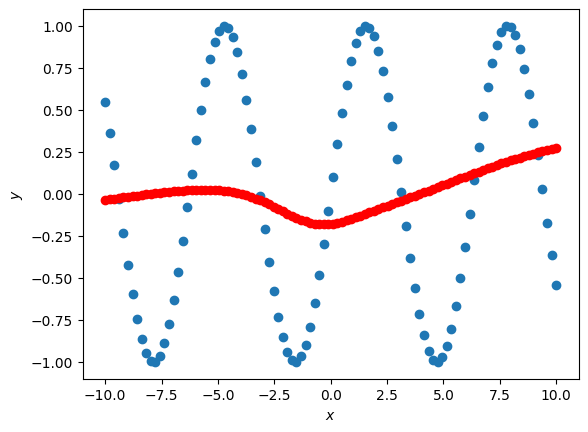

In [20]:
predict(my_net, x_test, y_test)